In [1]:
import sys
from pathlib import Path
parent_dir = Path.cwd().parent
sys.path.append(str(parent_dir))

from PIL import Image
import sys
from pathlib import Path
from PIL import Image
import torch
import numpy as np
from molmo_utils import load_model, do_inference, get_coordinates, calculate_probability_of_coordinates
from utils import extract_all, plot_scatter, calculate_normalized_euclidian_distance, visualize_points_on_image, calculate_spread, cluster_data, show_cluster

2025-02-13 09:33:15.566272: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-13 09:33:16.468864: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-13 09:33:16.468909: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-13 09:33:16.468944: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-13 09:33:16.741197: I tensorflow/core/platform/cpu_feature_g

In [2]:
model_name = 'allenai/Molmo-7B-D-0924'
model, processor = load_model(model_name)

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
def run_experiment(path_to_experiments, prompt_starts, prompt_ends, runs_per_task, temperature, epsilon, min_samples):
    tasks, images, ground_truths, objects = extract_all(path_to_experiments)
    softmax_fn = torch.nn.Softmax(dim=-1)
    labels = []

    coordinates = [[],[]]

    distances = [[],[]]
    
    spreads = [[],[]]

    diameters = [[],[]]

    majority_size_rates = [[],[]]

    probs = [[],[]]
    
    for i in range(len(tasks)):
        task = tasks[i]
        labels.append(task)
        ground_truth = ground_truths[i]

        objects_of_task = objects[i]
        object = " The releveant object is: " + objects_of_task[0] + " "
        prompt_what = prompt_starts[0] + task + object + prompt_ends[0]
        prompt_where = prompt_starts[1] + task + object + prompt_ends[1]


        print(f"{task}")
        with Image.open(images[i]) as image:
            image_width = image.width
            image_height = image.height
    
            prompts = [prompt_what]
            if (len(ground_truth) == 2):
                prompts.append(prompt_where)
                labels.append(task)
    
            for k in range(len(prompts)):
                task_coordinates = []
                task_distances = []
                probabilities = []
                
                for j in range(runs_per_task):
                    output_text, output, inputs = do_inference(image, prompts[k], model, processor, temperature)                    
                    coords = get_coordinates(output_text, image_width, image_height)
                    
                    if len(coords) == 1:
                        norm_dist = calculate_normalized_euclidian_distance(coords[0], ground_truth[k], image_width, image_height)
                        task_coordinates += coords
                        task_distances.append(norm_dist)
                        probabilities.append(calculate_probability_of_coordinates(output, inputs, processor))
                coordinates[k].append(task_coordinates)
                        

                
                n_clusters, majority_points, noisy_points, centroid, diameter = cluster_data(task_coordinates, epsilon=epsilon, min_samples=min_samples)
                if (n_clusters != 0):
                    norm_dist = calculate_normalized_euclidian_distance(centroid, ground_truth[k], image_width, image_height)
                    distances[k].append(norm_dist)
                    spreads[k].append(calculate_spread(task_coordinates, image_width, image_height))
                    diameters[k].append(diameter)
                    majority_size_rates[k].append(len(majority_points) / len(task_coordinates))
                    probs[k].append(np.mean(probabilities))
                    show_cluster(image, majority_points, noisy_points, centroid, diameter)
                else:
                    visualize_points_on_image(image, ["predictions"], [task_coordinates], object)

                print("")

    return coordinates, distances, spreads, diameters, majority_size_rates, probs, images, tasks


pick up the wooden block and place it on top of the arch.
Didnt find any cluster


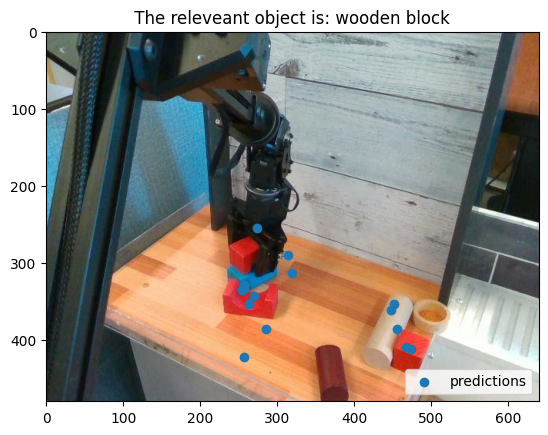


Number of clusters: 1
Number of noisy points: 7
Centroid of majority cluster: [321.5   237.625]
Diameter of majority cluster: 13.0


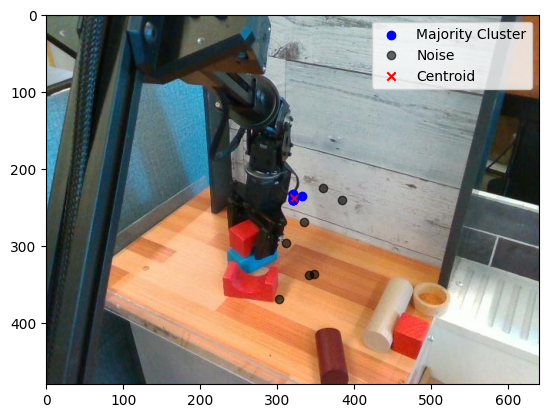


pick up vegetable and put it on the table.
Number of clusters: 1
Number of noisy points: 7
Centroid of majority cluster: [193.625 110.375]
Diameter of majority cluster: 13.038404810405298


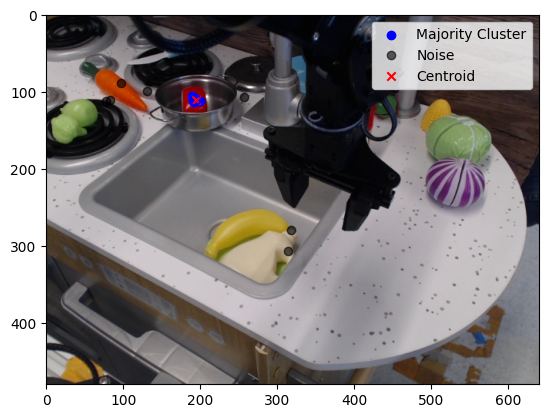


Number of clusters: 1
Number of noisy points: 0
Centroid of majority cluster: [517.06666667 143.13333333]
Diameter of majority cluster: 46.09772228646444


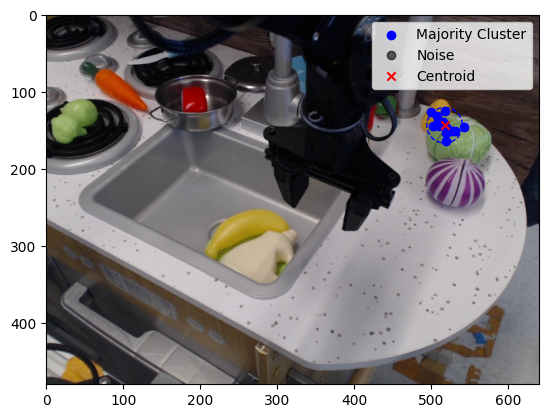


pick up glass cup
Number of clusters: 1
Number of noisy points: 4
Centroid of majority cluster: [255.90909091 297.18181818]
Diameter of majority cluster: 33.24154027718932


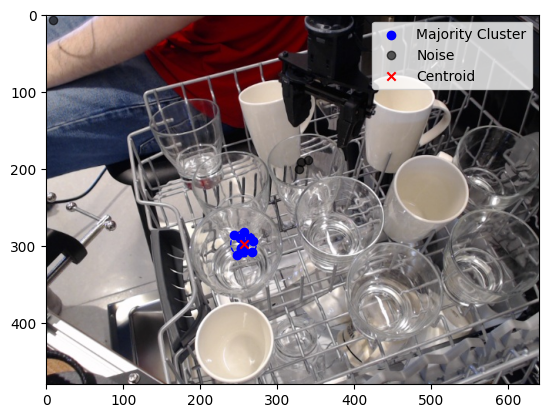


pick up red srewdriver
Didnt find any cluster


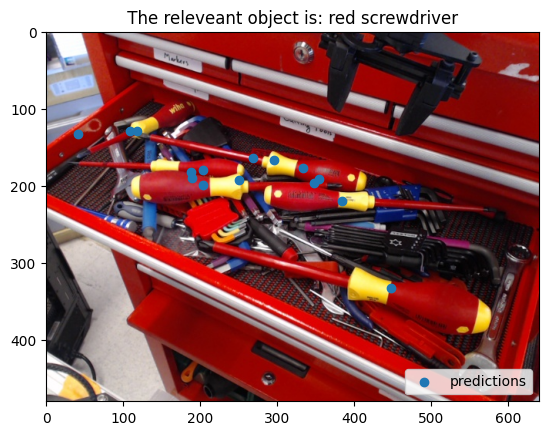


pick up the bean.
Number of clusters: 1
Number of noisy points: 7
Centroid of majority cluster: [257.125 125.125]
Diameter of majority cluster: 38.0


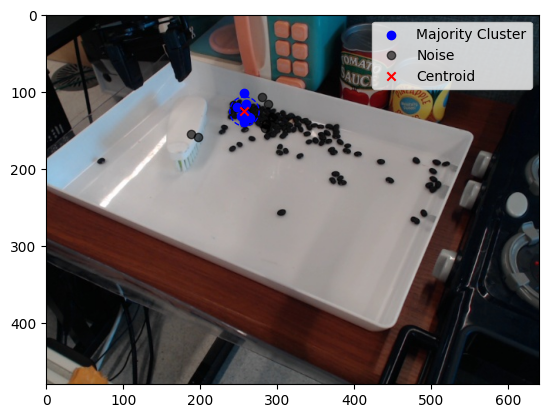


pick up the diamond.
Number of clusters: 1
Number of noisy points: 10
Centroid of majority cluster: [333.6 298. ]
Diameter of majority cluster: 31.76476034853718


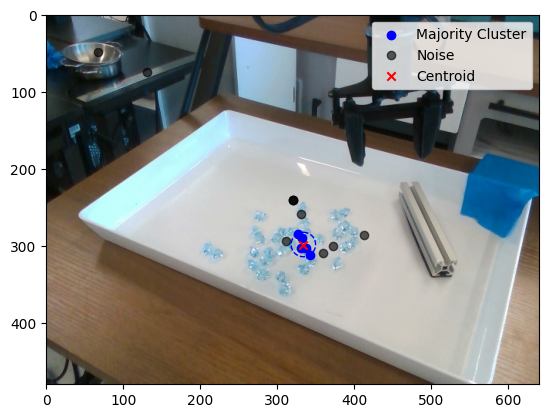


pick up vegetable and put it on the green cutting board.
Number of clusters: 1
Number of noisy points: 0
Centroid of majority cluster: [134.4        179.53333333]
Diameter of majority cluster: 25.942243542145693


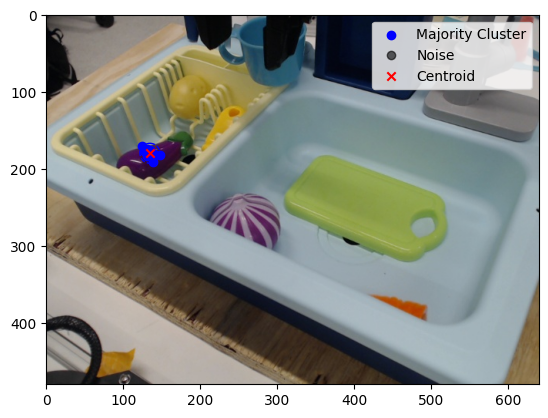


Number of clusters: 1
Number of noisy points: 4
Centroid of majority cluster: [417.45454545 245.63636364]
Diameter of majority cluster: 51.478150704935004


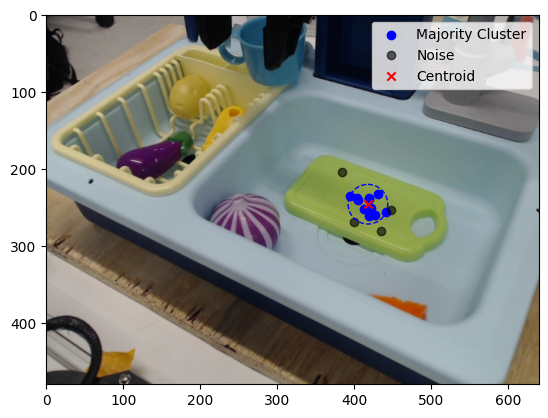


pick up cloth.
Number of clusters: 1
Number of noisy points: 10
Centroid of majority cluster: [141.2 287.4]
Diameter of majority cluster: 22.090722034374522


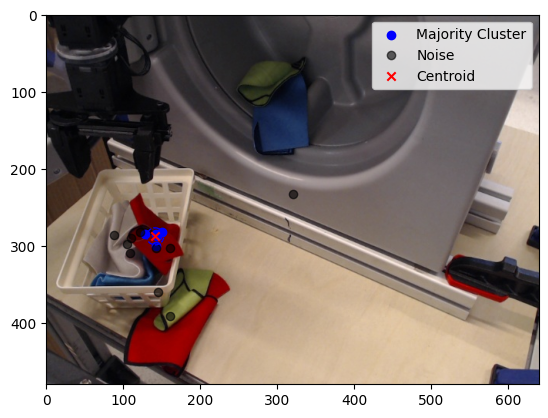


pick up vegetable from the sink and put it on the right side of the sink.
Number of clusters: 2
Number of noisy points: 2
Centroid of majority cluster: [309.55555556 409.33333333]
Diameter of majority cluster: 28.460498941515414


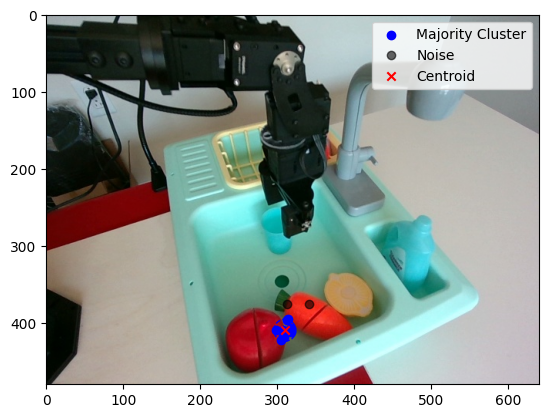


Number of clusters: 1
Number of noisy points: 0
Centroid of majority cluster: [478.06666667 309.46666667]
Diameter of majority cluster: 40.26164427839479


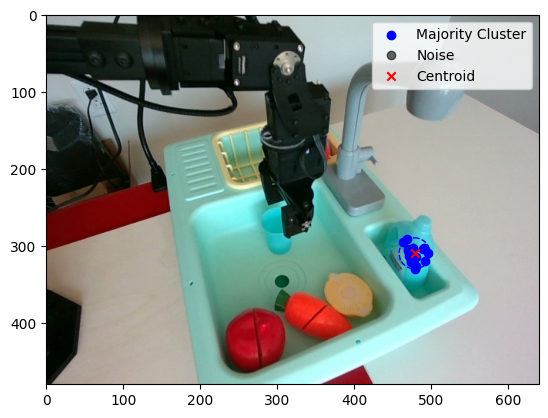


pick up the can and put it next to the tomato.
Number of clusters: 2
Number of noisy points: 1
Centroid of majority cluster: [122.25  263.125]
Diameter of majority cluster: 24.73863375370596


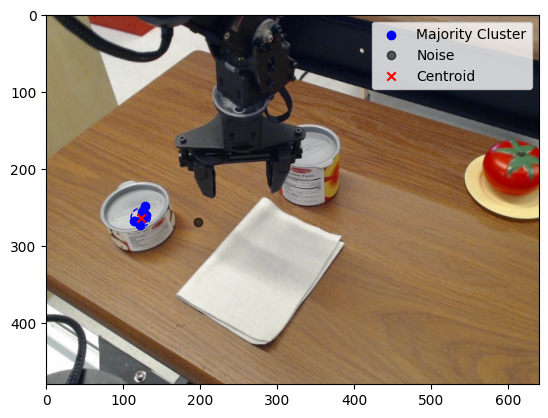


Number of clusters: 1
Number of noisy points: 11
Centroid of majority cluster: [590. 236.]
Diameter of majority cluster: 24.20743687382041


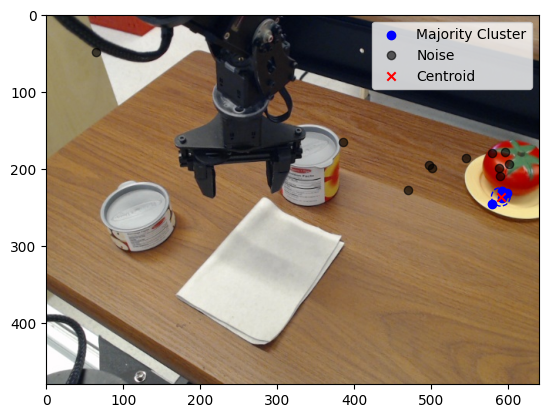

In [9]:
experiment_path = "../data/uncertain_experiments"
num_runs = 15
temperature = 0.6

epsilon = 15
min_samples = 4

prompt_starts = ["You are the robot in the picture. Your mission it to guide and support the user in its task to: ", "You are the robot in the picture. Your mission it to guide and support the user in its task to: "]
prompt_ends = [" For that you have to point to the relevant object in the picture. Your output format should be like this: (x1, y1) with (x1, y1) beeing the coordinates of the object to move. Dont output anything else.", " For that you have to point to the place in the picture where the object has to be moved to. Your output format should be like this: (x1, y1) with (x1, y1) beeing the coordinates of the place where the object has to be moved to. Dont output anything else."]

coordinates, distances, spreads, diameters, majority_size_rates, probs, images, tasks = run_experiment(experiment_path, prompt_starts, prompt_ends, num_runs, temperature, epsilon, min_samples)

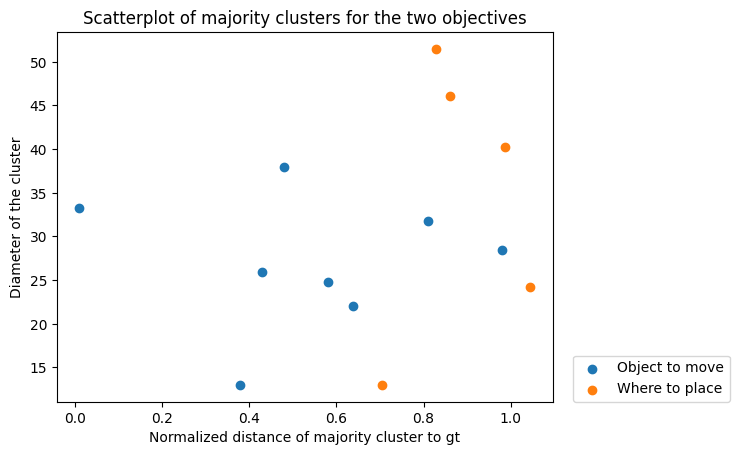

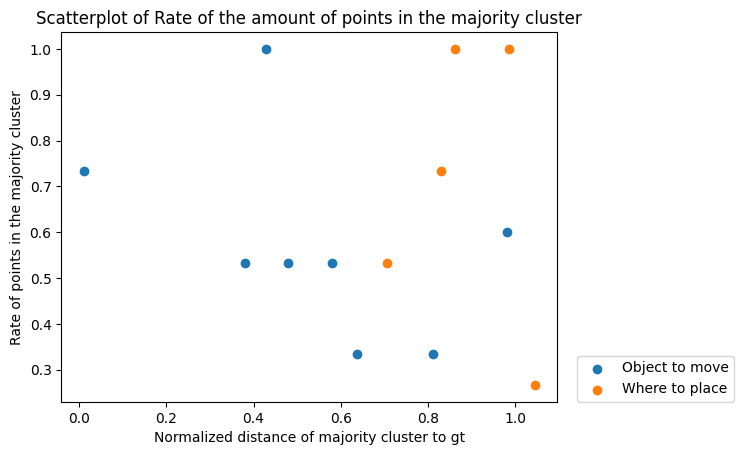

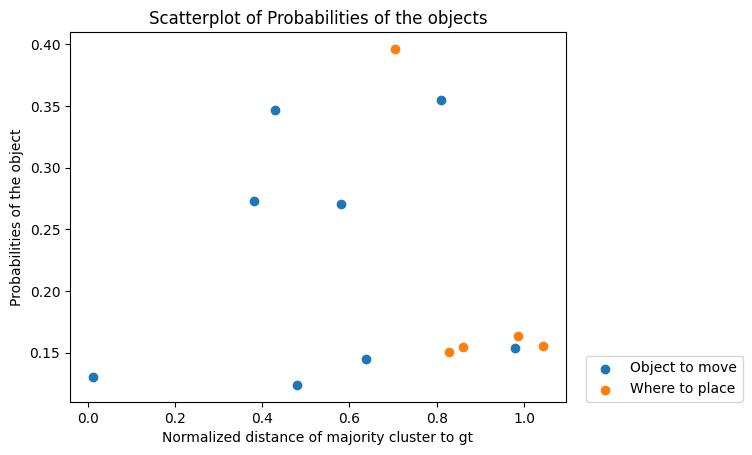

In [10]:
plot_scatter(["Object to move", "Where to place"], [diameters[0], diameters[1]], [distances[0], distances[1]], "Scatterplot of majority clusters for the two objectives",  "Normalized distance of majority cluster to gt", "Diameter of the cluster")
plot_scatter(["Object to move", "Where to place"], [majority_size_rates[0], majority_size_rates[1]], [distances[0], distances[1]], "Scatterplot of Rate of the amount of points in the majority cluster", "Normalized distance of majority cluster to gt", "Rate of points in the majority cluster")
plot_scatter(["Object to move", "Where to place"], [probs[0], probs[1]], [distances[0], distances[1]], "Scatterplot of Probabilities of the objects", "Normalized distance of majority cluster to gt", "Probabilities of the object")
